Title: Impacts of Environmental Condition on Woody Plant Growth

Author: Jacqueline Hernandez, Cam Angulo, Will Harrigan

Date: 2022-12-1

Summary: We used Ghannoum et al's allometric data of Eucalyptus saligna and Eucalyptus sideroxylon individuals grown for 80 and 150 days under one of three CO2 concentrations and one of two temperatures. These treatment groups were meant to mimic pre-industrial, current, and future environmental conditions. We used the corresponding paper to guide us in our data wrangling, analysis and data visualization goals. 

Based on Ghannoum, O. et al. "Exposure to Preindustrial, current, and future atmospheric CO2 and temperature differentially affects growth and photosynthesis in Eucalyptus." Global Change Biology, Volume 16, pages 303-319. doi:10.1111/j.1365-2486.2009.02003.x

Raw data sourced from https://github.com/dfalster/baad/tree/master/data/Ghannoum2010b and https://github.com/dfalster/baad/tree/master/data/Ghannoum2010a

# R Packages

In [40]:
#R Packages -- This list includes all of the packages used for data analysis

library(dplyr)
library(tibble)
library(scales)
library(ggplot2)

# Tidying and Cleaning Data

In [41]:
#1
#Our data is collected from a GitHub Repository
#Here we read the raw data into a tibble and save the tibbles as Ghannoum_b and Ghannoum_a
#Ghannoum is the author who collected and published this data
#Ghannoum_a data is collected over long timescale (150 days), and a more comprehensive survey of woody plant growth
#Ghannoum_b data is collected over a shorter timescale (80 days)

Ghannoum_b <- tibble(read.csv(url("https://raw.githubusercontent.com/dfalster/baad/master/data/Ghannoum2010b/data.csv")))
Ghannoum_a <- tibble(read.csv(url("https://raw.githubusercontent.com/dfalster/baad/master/data/Ghannoum2010a/data.csv")))

head(Ghannoum_b)
head(Ghannoum_a)

Species,Temp,CO2,Potnum,LA,Height,Basaldia,LeafDW,StemDW,RootDW,LMA,LAR
<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Saligna,Amb,400,55,376,23.3,2.97,1.12,0.44,1.28,29.79,13.25
Saligna,Amb,400,51,682,20.1,3.07,0.89,0.34,0.95,13.05,31.34
Saligna,Amb,400,78,539,28.2,3.11,1.46,0.65,1.21,27.09,16.22
Saligna,Amb,400,77,739,17.6,2.51,0.54,0.20,0.47,7.31,61.03
Saligna,Amb,400,49,582,24.3,3.38,1.61,0.74,1.34,27.66,15.78
Saligna,Amb,400,45,258,16.4,2.57,0.62,0.28,1.01,24.03,13.54


Species,CO2,Temp,Water,Potnum,LeafDW,StemDW,RootDW,RootShoot,LMA,⋯,Basaldia1,Basaldia2,Tipdia1,Tipdia2,Height,Branchnum,Mainstemnum,Primarybranchnum,Secondarybranchnum,Tertiarybranchnum
<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
Saligna,280,Amb,dry,132,15.74,13.10,8.77,0.30,32.48,⋯,8.35,8.29,1.30,1.72,97,61,NA,28,33,0
Saligna,280,Amb,dry,133,17.58,14.16,22.74,0.71,34.22,⋯,8.40,8.42,1.43,1.28,105,59,NA,26,33,0
Saligna,280,Amb,dry,139,18.19,15.30,15.62,0.46,33.35,⋯,9.61,9.59,1.82,3.08,115,37,NA,27,10,0
Saligna,280,Amb,dry,150,14.22,13.83,8.01,0.28,33.01,⋯,7.84,7.80,2.45,2.05,112,53,NA,31,22,0
Saligna,280,Amb,dry,158,22.26,18.42,22.19,0.54,40.22,⋯,9.35,9.21,2.80,1.74,104,76,NA,32,44,0
Saligna,280,Amb,dry,162,18.71,17.50,18.41,0.50,40.90,⋯,10.13,10.60,1.47,1.99,103,60,NA,29,31,0


In [42]:
#2
#We are going to combine Ghannoum_b with Ghannoum_a
#Before we do so we added columns of time-scale to the data so we can compare each treatment and how the timescales relates to data
Ghannoum_b$DAP <- 80 
Ghannoum_a$DAP <- 150


In [43]:
#3 
#We also want to compare total dry-weight between datasets
#Before we combine the data-sets we add a column called TotalDW, which is the sum of all the dry-weight measurements collected

Ghannoum_b$totalDW <- Ghannoum_b$LeafDW + Ghannoum_b$StemDW + Ghannoum_b$RootDW
Ghannoum_a$totalDW <- Ghannoum_a$LeafDW + Ghannoum_a$StemDW + Ghannoum_a$RootDW


In [44]:
#4
#Here we fix a few inconsistently named species rows in Ghannoum_a and b

Ghannoum_b$Species[which(Ghannoum_b$Species=="E. saligna")] <- "Saligna" 
Ghannoum_a$Species[which(Ghannoum_b$Species=="E. saligna")] <- "Saligna"

In [53]:
#5
#Here we create a subset of the species, total DW, DAP (date after planting)

species <- c(Ghannoum_a$Species, Ghannoum_b$Species)
temp <- c(Ghannoum_a$Temp, Ghannoum_b$Temp)
co2 <- c(Ghannoum_a$CO2, Ghannoum_b$CO2)
total_dw <- c(Ghannoum_a$totalDW, Ghannoum_b$totalDW)
dap <- c(Ghannoum_a$DAP, Ghannoum_b$DAP)

ghanAB_dw_dap <- data.frame(species, temp, co2, dap, total_dw)
head(ghanAB_dw_dap)


,species,temp,co2,dap,total_dw
,<chr>,<chr>,<int>,<dbl>,<dbl>
1,Saligna,Amb,280,150,37.61
2,Saligna,Amb,280,150,54.48
3,Saligna,Amb,280,150,49.11
4,Saligna,Amb,280,150,36.06
5,Saligna,Amb,280,150,62.87
6,Saligna,Amb,280,150,54.62


In [54]:
#6
#Here we add height to our total Ghannoum dataframe
height<- c(Ghannoum_a$Height, Ghannoum_b$Height)

ghanAB_total <- cbind(ghanAB_dw_dap, height)
head(ghanAB_total)


,species,temp,co2,dap,total_dw,height
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,Saligna,Amb,280,150,37.61,97
2,Saligna,Amb,280,150,54.48,105
3,Saligna,Amb,280,150,49.11,115
4,Saligna,Amb,280,150,36.06,112
5,Saligna,Amb,280,150,62.87,104
6,Saligna,Amb,280,150,54.62,103


In [47]:
#7 
#For data analysis we also want to compare the Relative Growth Rate (RGR) and Net Assimilation Rate (NAR)
#Here we create a table with NAs so we can use a function to add the rates to the table

species <- sort(rep(unique(Ghannoum_b$Species), 6))
temp <- unique(Ghannoum_b$Temp) %>% rep(3) %>% sort
CO2 <- unique(Ghannoum_b$CO2) %>% sort %>% rep(4)
rgr <- rep(NA, 12)
nar <- rep(NA, 12)
ghanB_rgr_nar<- data.frame(species, temp, CO2, rgr, nar) 
head(ghanB_rgr_nar)

,species,temp,CO2,rgr,nar
,<chr>,<chr>,<int>,<lgl>,<lgl>
1,Saligna,Amb,280,NA,NA
2,Saligna,Amb,400,NA,NA
3,Saligna,Amb,640,NA,NA
4,Saligna,Elv,280,NA,NA
5,Saligna,Elv,400,NA,NA
6,Saligna,Elv,640,NA,NA


## Relative Growth Rate (RGR) and Net Assimilation Rate (NAR)
To find relative growth rate and net assimilation rate the following equation was used, as quoted from Ghannoum et al 2010:

We first subset the data by the 12 treatment groups, which varied on species (E. saligna versus E. sideroxylon), temperature (ambient versus elevated) and CO2 levels (280, 400, and 640 ppm). Looking at each subset, we paired trees from DAP 80 (T1) and DAP 150 (T2) depending on size. We then calculated RGR and NAR for all 12 subsets per the equations and averaged the results. 

We compared those averages with total treatment averages, meaning we summed all of the dry mass, whole plant leaf area, and times for DAP 80 and DAP 150 and then calculated the equation below. 

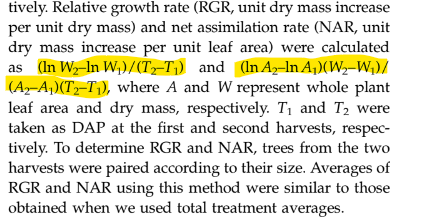

In [48]:
#8
#Here we calculate the average RGR and NAR for Temp, CO2 and Species
rgr_nar <- function(n){
    tmp_DW80 <- subset(Ghannoum_b, Species == ghanB_rgr_nar$species[n] & Temp == ghanB_rgr_nar$temp[n] & CO2== ghanB_rgr_nar$CO2[n], select = totalDW) %>% sum
    tmp_DW150 <- subset(Ghannoum_a, Species == ghanB_rgr_nar$species[n] & Temp == ghanB_rgr_nar$temp[n] & CO2 == ghanB_rgr_nar$CO2[n], select = totalDW) %>% sum
    rgr <- (log(tmp_DW150) - log(tmp_DW80)) / 70
    
    tmp_LA80 <- subset(Ghannoum_b, Species == ghanB_rgr_nar$species[n] & Temp == ghanB_rgr_nar$temp[n] & CO2== ghanB_rgr_nar$CO2[n], select = LA) %>% sum
    tmp_LA150 <- subset(Ghannoum_a, Species == ghanB_rgr_nar$species[n] & Temp == ghanB_rgr_nar$temp[n] & CO2== ghanB_rgr_nar$CO2[n], select = LA) %>% sum
    nar <- ((log(tmp_LA150) - log(tmp_LA80)) * (tmp_DW150 - tmp_DW80)) / ((tmp_LA150 - tmp_LA80)* 70)
    return(c(rgr,nar))}

In [49]:
#9 
#Adding rgr and nar averages into the ghanB_rgr_nar dataframe
tmp <- t(mapply(rgr_nar, 1:12)) 

ghanB_rgr_nar$rgr <- tmp[,1]
ghanB_rgr_nar$nar <- tmp[,2]
head(ghanB_rgr_nar)

,species,temp,CO2,rgr,nar
,<chr>,<chr>,<int>,<dbl>,<dbl>
1,Saligna,Amb,280,0.04532699,0.0004488385
2,Saligna,Amb,400,0.05461554,0.0005232528
3,Saligna,Amb,640,0.04709482,0.0005569811
4,Saligna,Elv,280,0.04539022,0.0003789528
5,Saligna,Elv,400,0.04017024,0.0004397112
6,Saligna,Elv,640,0.03846561,0.0005428327


In [50]:
#10
#We also want to investigate how leaf characteristics differ between species
#Here we create a dataframe consisting of all leaf characteristics between the two datasets
#These metrics act as a good indicator of plant functioning
#LMA = Leaf mass per area
#LAR = Leaf assimilation rate

species <- c(Ghannoum_a$Species, Ghannoum_b$Species)
temp <- c(Ghannoum_a$Temp, Ghannoum_b$Temp)
co2 <- c(Ghannoum_a$CO2, Ghannoum_b$CO2)
leaf_dw <- c(Ghannoum_a$LeafDW, Ghannoum_b$LeafDW)
lma <- c(Ghannoum_a$LMA, Ghannoum_b$LMA)
lar <- c(Ghannoum_a$LAR, Ghannoum_b$LAR)

leaf_data <- data.frame(species, temp, co2, leaf_dw,lma,lar) 

head(leaf_data)

,species,temp,co2,leaf_dw,lma,lar
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,Saligna,Amb,280,15.74,32.48,12.7
2,Saligna,Amb,280,17.58,34.22,9.4
3,Saligna,Amb,280,18.19,33.35,11.0
4,Saligna,Amb,280,14.22,33.01,11.8
5,Saligna,Amb,280,22.26,40.22,8.7
6,Saligna,Amb,280,18.71,40.90,8.3


# Exploratory Analysis

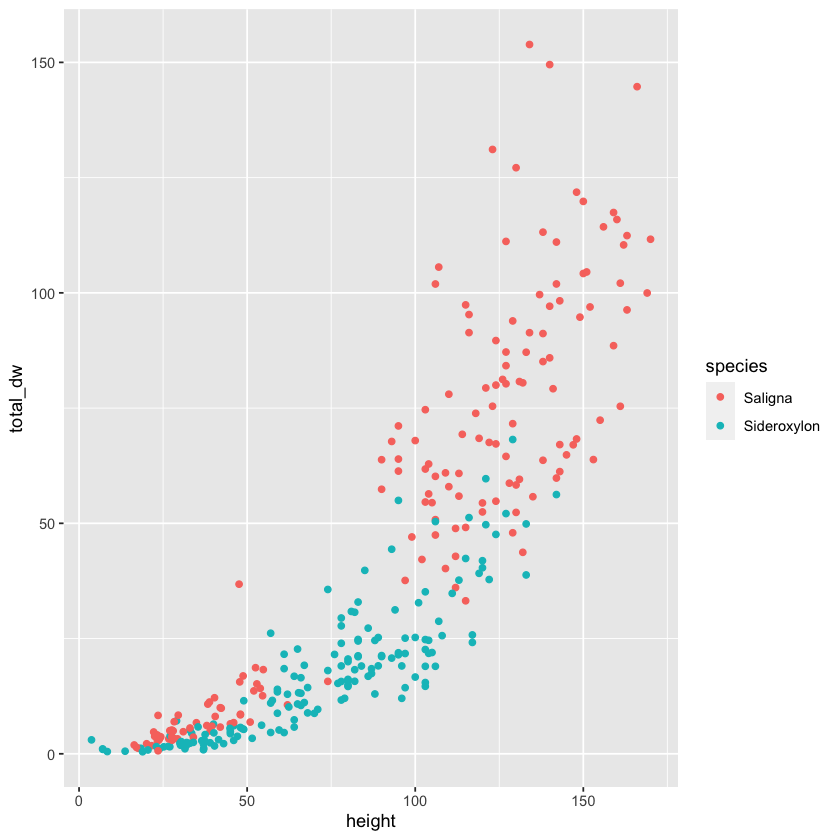

In [58]:
#Exploratory plot of height relative to total_dw

p <- ggplot(ghanAB_total, aes(height, total_dw))
p + geom_point(aes(colour = species))

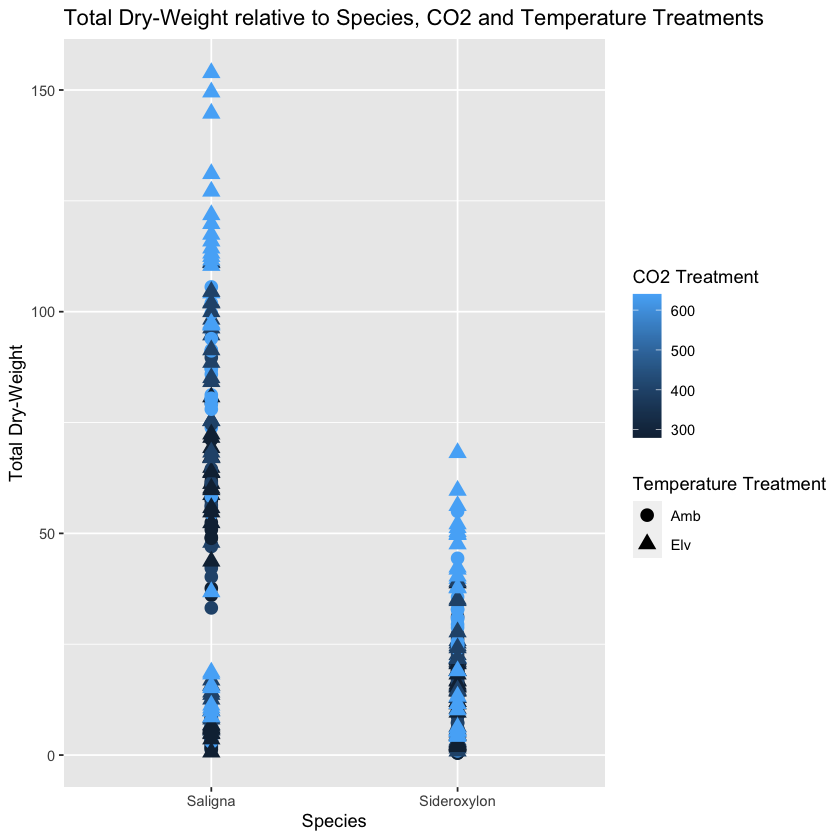

In [59]:
#Exploratory plot
#Plot of Dry-Weight relative to species, CO2 and Temperature Treatments 
p <- ggplot(data = ghanAB_total)
p + geom_point(aes(x=species, y= total_dw, color= co2, shape = temp), size = 3.5)+
labs(title = "Total Dry-Weight relative to Species, CO2 and Temperature Treatments" ,x="Species", y= 'Total Dry-Weight', color = "CO2 Treatment", shape = "Temperature Treatment")

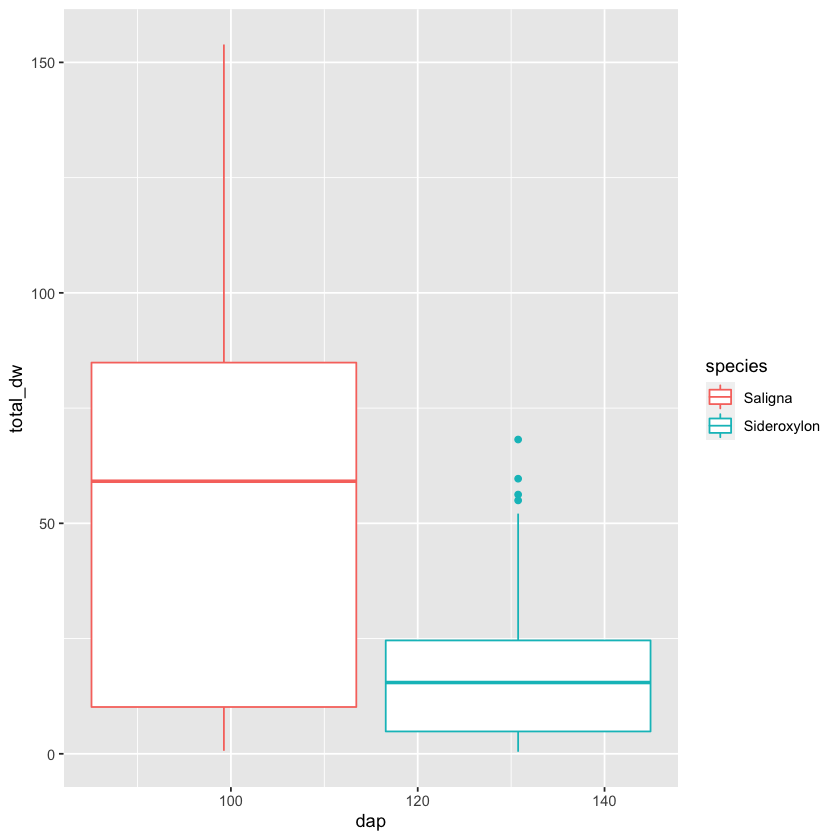

In [62]:
#Exploratory plot of total_dw relative to days after planting

p <- ggplot(ghanAB_total, aes(dap, total_dw))
p + geom_boxplot(aes(colour = species))

# Statistical Analyses
In Ghannoum et al 2010, "Data were analyzed using a general linear model, ANOVA with species, growth [C02] and growth temperature as independent factors. Means were compared using Newman-Keuls post-hoc test." Thus, we also ran those statisical analyses and were able to replicate Table 1 and Table 2. 

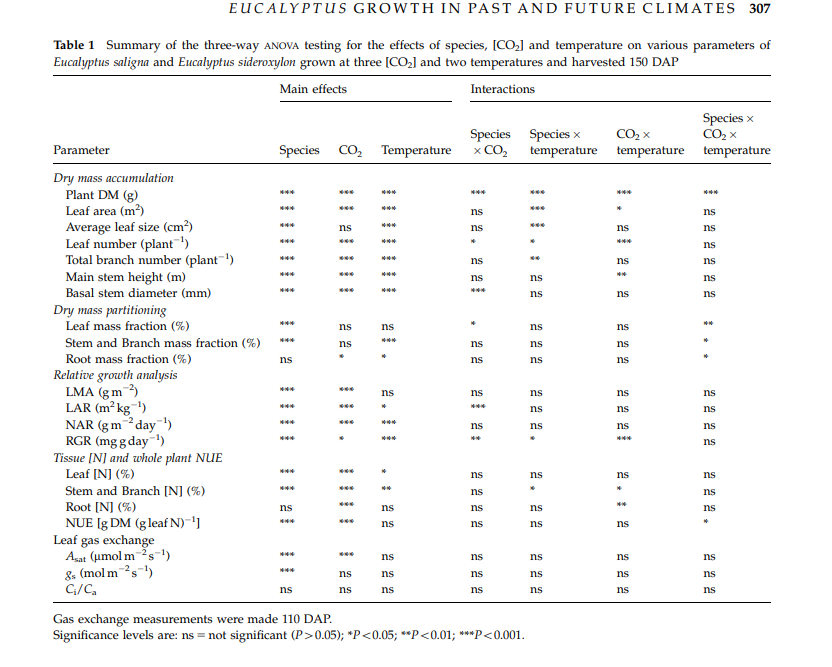
Table 1.

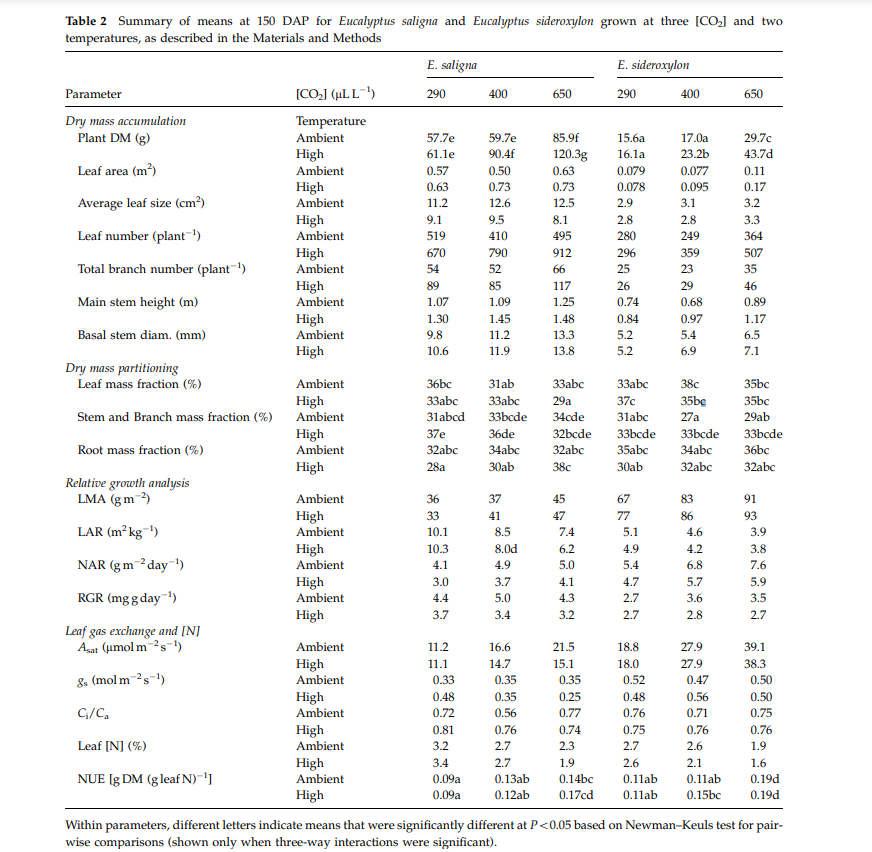
Table 2. 

In [23]:
#We chose to run 3-way ANOVA, as Ghannoum et al. suggested this method
#Sorting data by treatment and adding a column for the means to give a visualization of what to expect in the data

Ghannoum_a %>%
  group_by(Species, Temp, CO2) %>%
  summarize(mean_totalDW = mean(totalDW))



`summarise()` has grouped output by 'Species', 'Temp'. You can override using
the `.groups` argument.


Species,Temp,CO2,mean_totalDW
<chr>,<chr>,<int>,<dbl>
Saligna,Amb,280,57.18389
Saligna,Amb,400,58.96056
Saligna,Amb,640,84.71278
Saligna,Elv,280,60.16889
Saligna,Elv,400,89.07056
Saligna,Elv,640,118.83222
Sideroxylon,Amb,280,15.53500
Sideroxylon,Amb,400,16.81500
Sideroxylon,Amb,640,29.54889


                  Df Sum Sq Mean Sq  F value   Pr(>F)    
Species            1 155226  155226 1027.652  < 2e-16 ***
CO2                1  37858   37858  250.635  < 2e-16 ***
Temp               1  11967   11967   79.226 2.82e-16 ***
Species:CO2        1   4581    4581   30.331 1.07e-07 ***
Species:Temp       1   3001    3001   19.865 1.36e-05 ***
CO2:Temp           1   3677    3677   24.346 1.65e-06 ***
Species:CO2:Temp   1    548     548    3.628   0.0582 .  
Residuals        207  31267     151                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

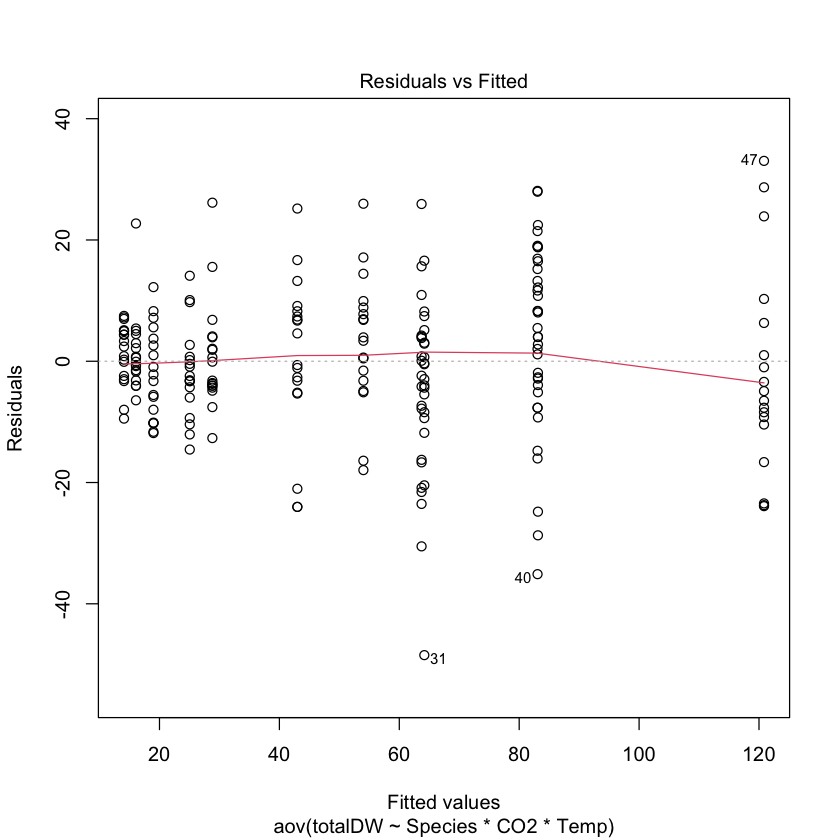

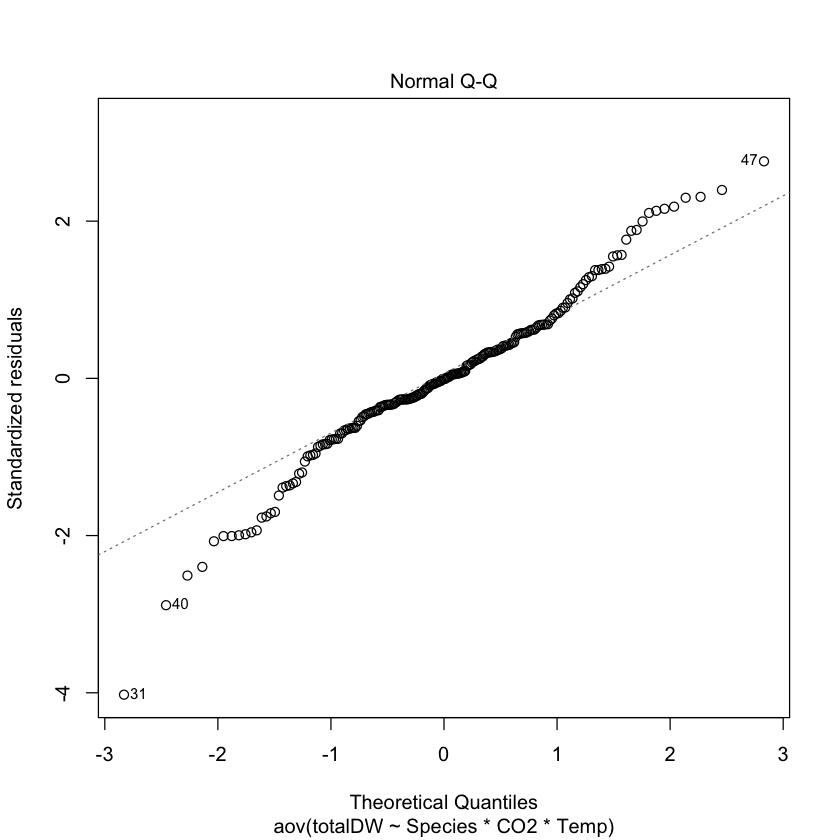

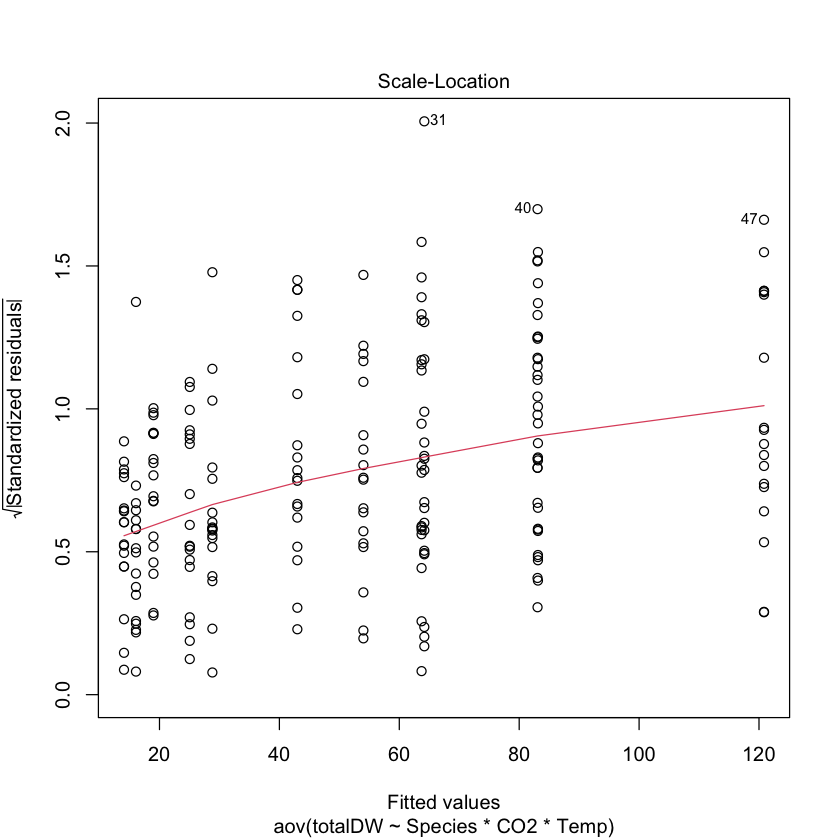

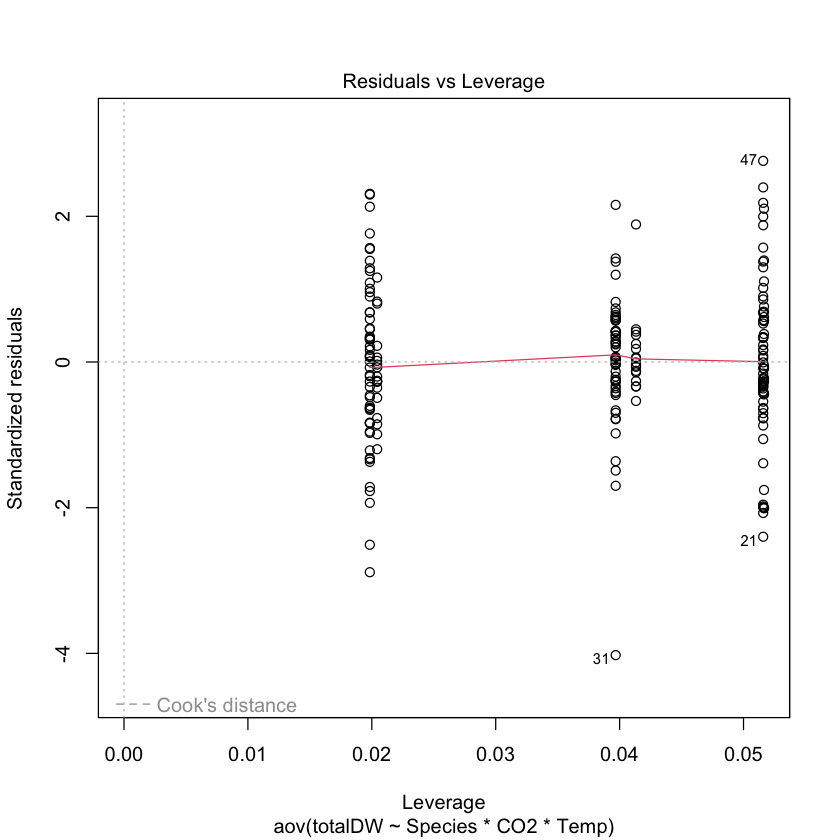

In [24]:
#perform three-way ANOVA on totalDW by species, CO2, temp
totaldw_aov <- aov(totalDW ~ Species * CO2 * Temp, data=Ghannoum_a)

#view summary of three-way ANOVA
summary(totaldw_aov)

#We are plotting to get a better visualization of residuals
plot(totaldw_aov)

In [33]:
#sorting data by treatment and adding a column for the mean of leafDW

leaf_data %>%
  group_by(species, temp, co2) %>%
  summarize(mean_leafDW = mean(leaf_dw))

`summarise()` has grouped output by 'species', 'temp'. You can override using
the `.groups` argument.


species,temp,co2,mean_leafDW
<chr>,<chr>,<int>,<dbl>
Saligna,Amb,280,14.181111
Saligna,Amb,400,12.716296
Saligna,Amb,640,19.507778
Saligna,Elv,280,14.084074
Saligna,Elv,400,20.930370
Saligna,Elv,640,24.966296
Sideroxylon,Amb,280,3.684444
Sideroxylon,Amb,400,4.270000
Sideroxylon,Amb,640,7.262963


                  Df Sum Sq Mean Sq F value   Pr(>F)    
species            1  11027   11027 142.710  < 2e-16 ***
co2                1   2472    2472  31.989 3.48e-08 ***
temp               1    841     841  10.881  0.00108 ** 
species:co2        1    120     120   1.559  0.21273    
species:temp       1    136     136   1.761  0.18540    
co2:temp           1    178     178   2.299  0.13047    
species:co2:temp   1      5       5   0.066  0.79725    
Residuals        315  24340      77                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

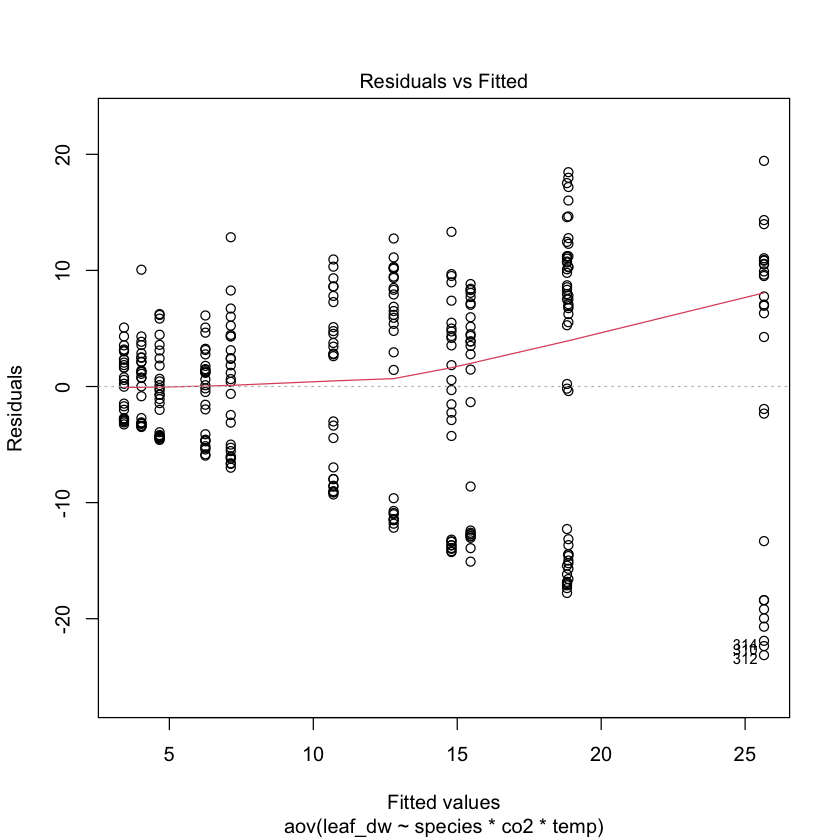

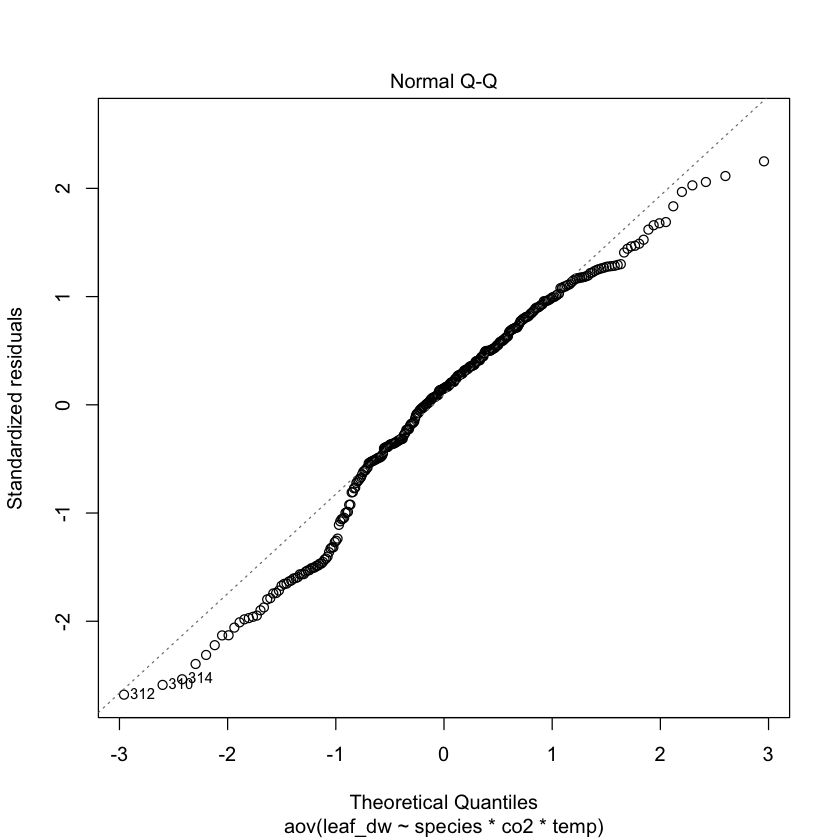

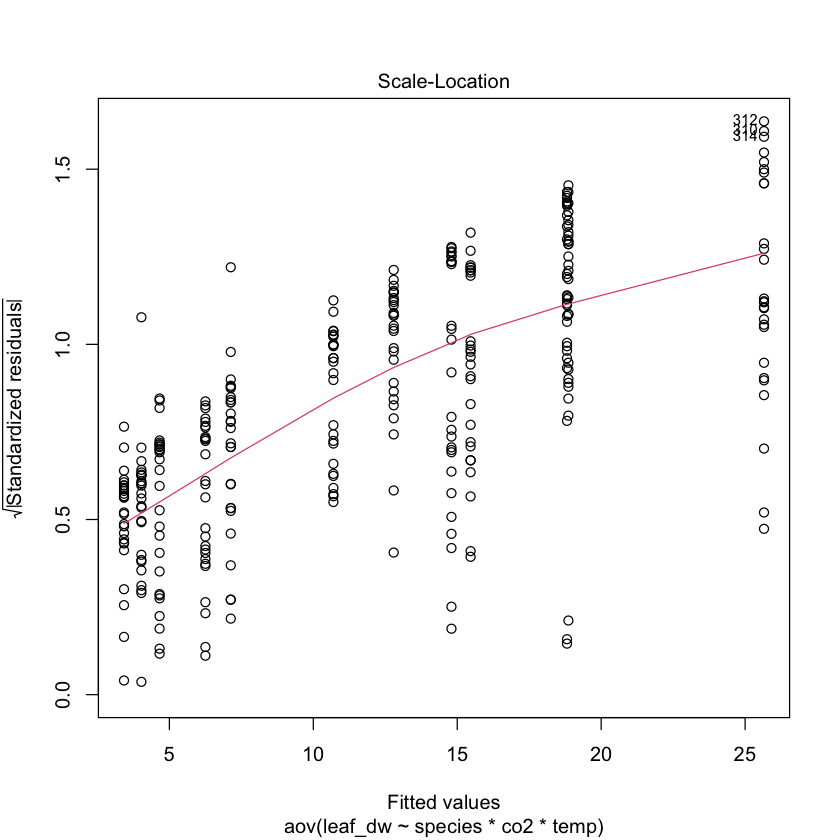

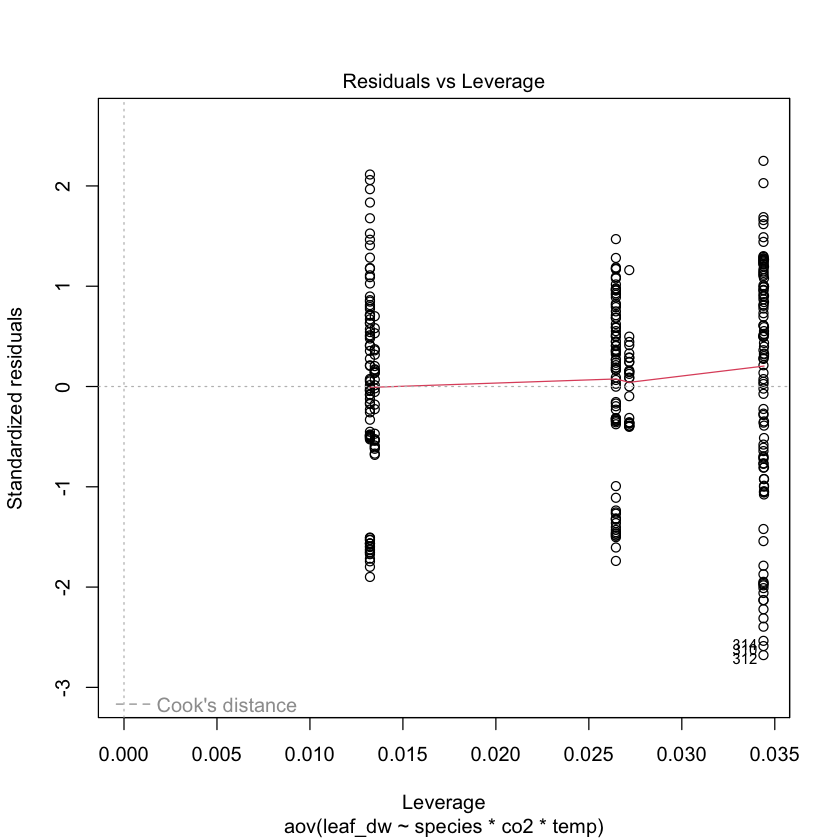

In [35]:
#running 3-way anova on leaf DW by treatments

leafdw_aov <- aov(leaf_dw ~ species * co2 * temp, data=leaf_data)

#view summary of three-way ANOVA
summary(leafdw_aov)

#plotting ANOVA
plot(leafdw_aov)

In [64]:
##sorting data by treatment and adding a column for the height means


ghanAB_total %>%
  group_by(species, temp, co2) %>%
  summarize(Height = mean(height))

`summarise()` has grouped output by 'species', 'temp'. You can override using
the `.groups` argument.


species,temp,co2,Height
<chr>,<chr>,<int>,<dbl>
Saligna,Amb,280,80.08148
Saligna,Amb,400,80.19259
Saligna,Amb,640,93.33333
Saligna,Elv,280,99.40741
Saligna,Elv,400,112.47037
Saligna,Elv,640,114.91481
Sideroxylon,Amb,280,60.40741
Sideroxylon,Amb,400,51.85556
Sideroxylon,Amb,640,70.56667


In [65]:
#3-way anova analysis on height


aov_height <- aov(height ~ species * co2 * temp, data=ghanAB_total)

#view summary of three-way ANOVA
summary(aov_height)

                  Df Sum Sq Mean Sq F value   Pr(>F)    
species            1  52468   52468  35.996 5.43e-09 ***
co2                1  14915   14915  10.232  0.00152 ** 
temp               1  40959   40959  28.100 2.17e-07 ***
species:co2        1    288     288   0.198  0.65705    
species:temp       1    287     287   0.197  0.65759    
co2:temp           1    450     450   0.308  0.57905    
species:co2:temp   1    512     512   0.351  0.55389    
Residuals        315 459151    1458                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

# Graphs
We copied or approximated the following graphs from the results section of the paper. 

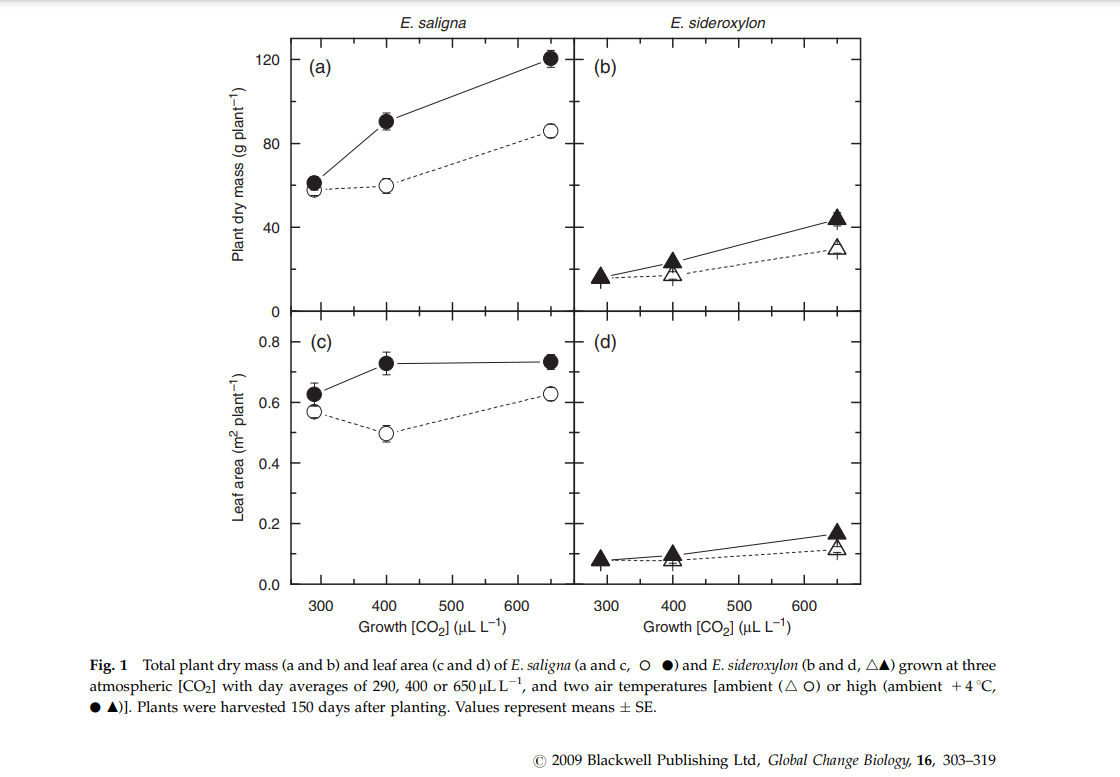
Fig 1. Total plant dry mass and leaf area of E. saligna and E. sideroxylon. Means with whiskers for SE. 

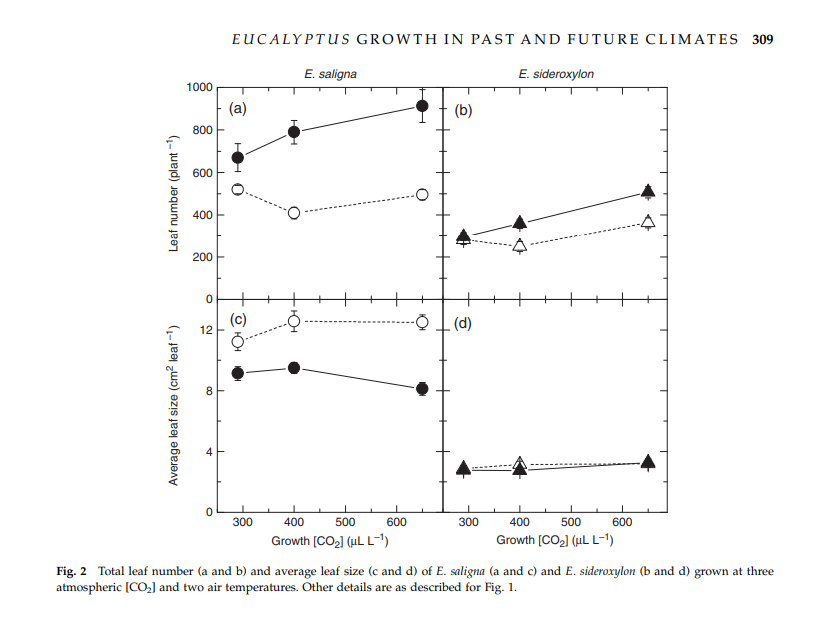

Fig 2. Total leaf number and average leaf size of E. saligna and E. sideroxylon grown at three atmospheric and two air temperatures. 

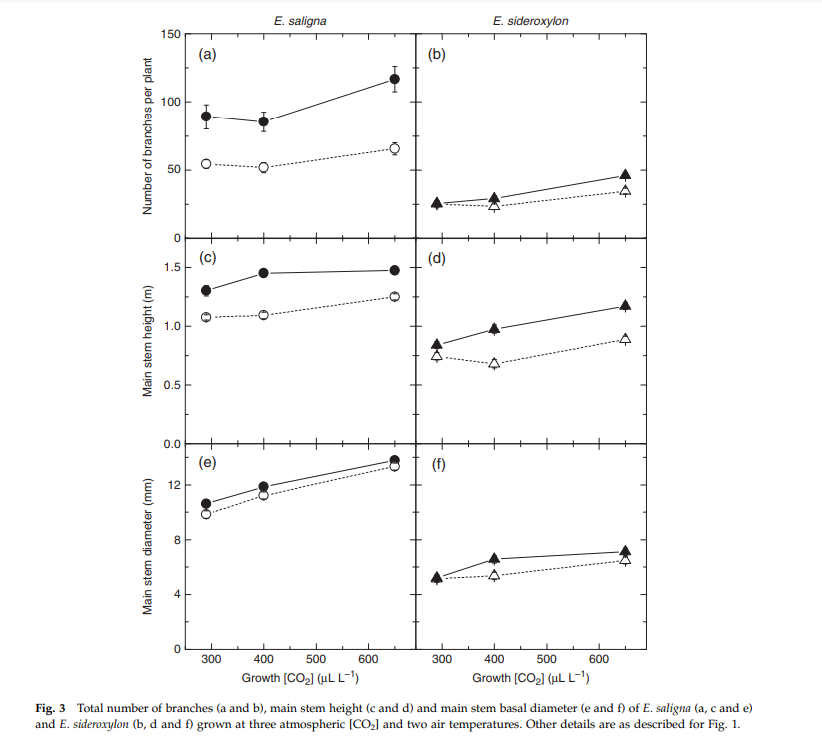

Fig 3. Total number of branches, main stem height and main stem basal diameter of E. saligna and E. sideroxylon grown at three atmospheric and two air temperatures. 

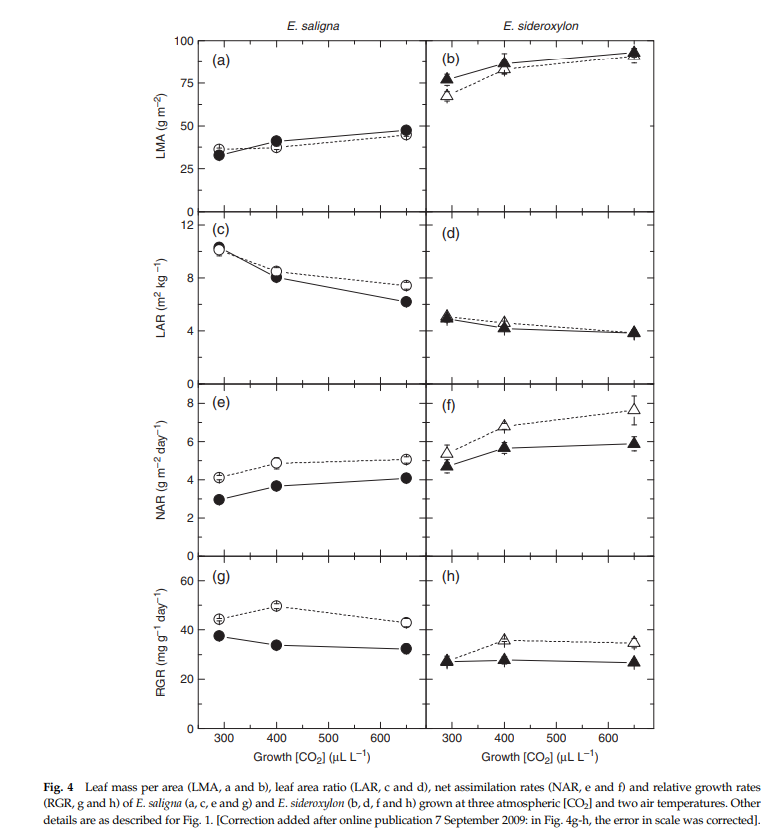
Fig 4. Leaf mass per area (LMA), leaf area ration (LAR), net assimilation rates( NAR) and RGR of E. saligna and E. sideroxylon grown at three atmospheric and two air temperatures. 

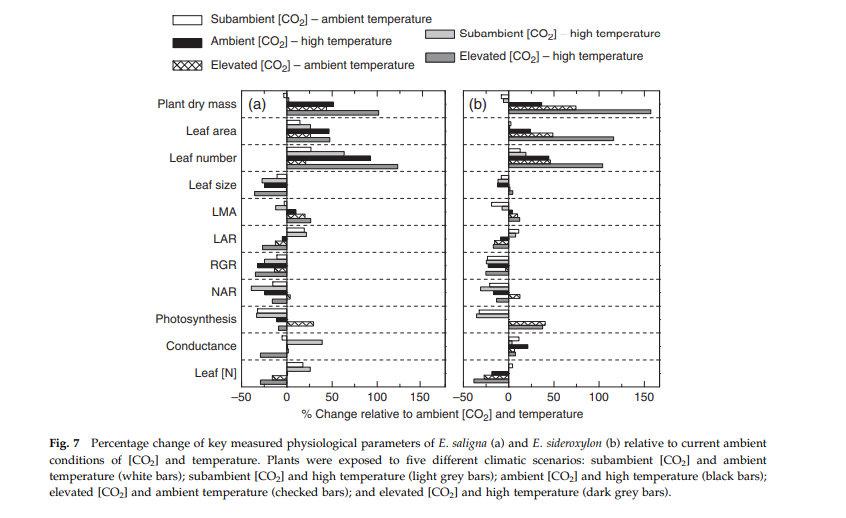
Fig 7. Percentage change of key measured physiological parameters of E. saligna and E. sideroxylon relative to current ambient conditions of CO2 and temp. 

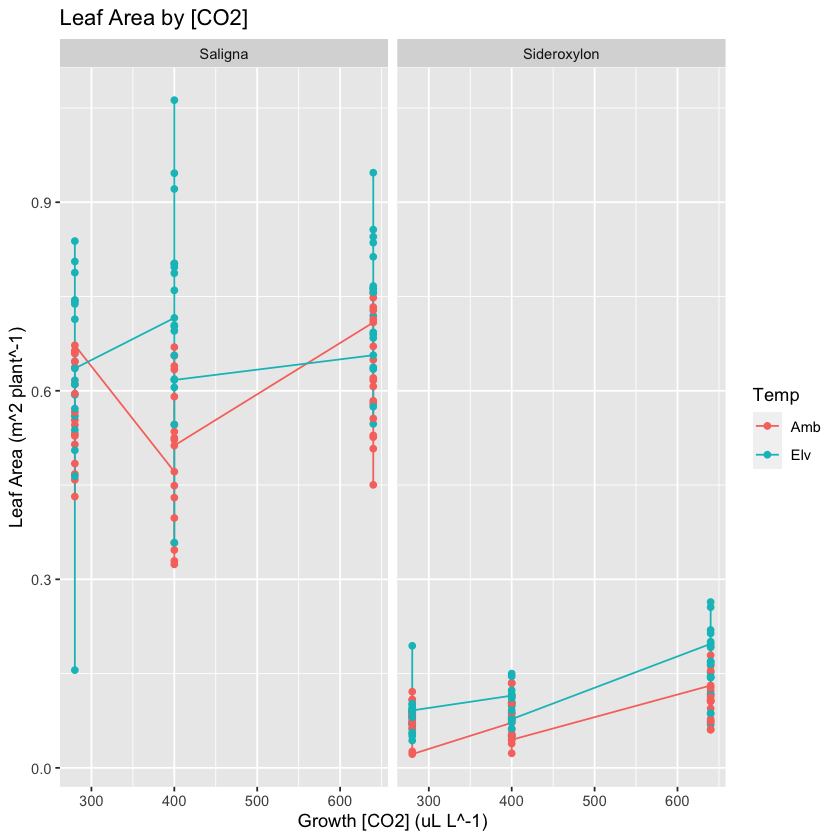

In [37]:
#Plotted leaf area against CO2 color-coded by temp for each species

LAplot <- ggplot(data =Ghannoum_a, aes(x=CO2,y=LA, colour = Temp)) + geom_line(linetype = 1) + geom_point() + facet_wrap(~Species)

LAplot + ggtitle("Leaf Area by [CO2]") +
  xlab("Growth [CO2] (uL L^-1)") + ylab("Leaf Area (m^2 plant^-1)") + scale_y_continuous(labels = label_number(scale = 1e-4))

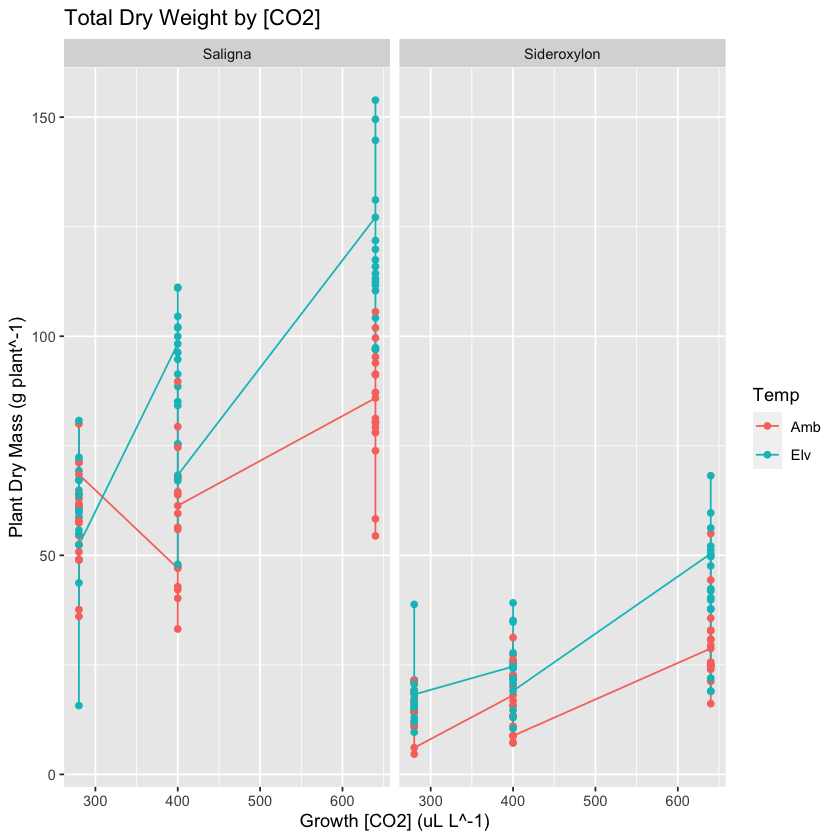

In [21]:
#Plotted total Dry Weight against CO2 color-coded by temp for each species

DWplot <- ggplot(data =Ghannoum_a, aes(x=CO2,y=totalDW, colour = Temp)) + geom_line(linetype = 1) + geom_point() + facet_wrap(~Species)

DWplot + ggtitle("Total Dry Weight by [CO2]") +
  xlab("Growth [CO2] (uL L^-1)") + ylab("Plant Dry Mass (g plant^-1)")

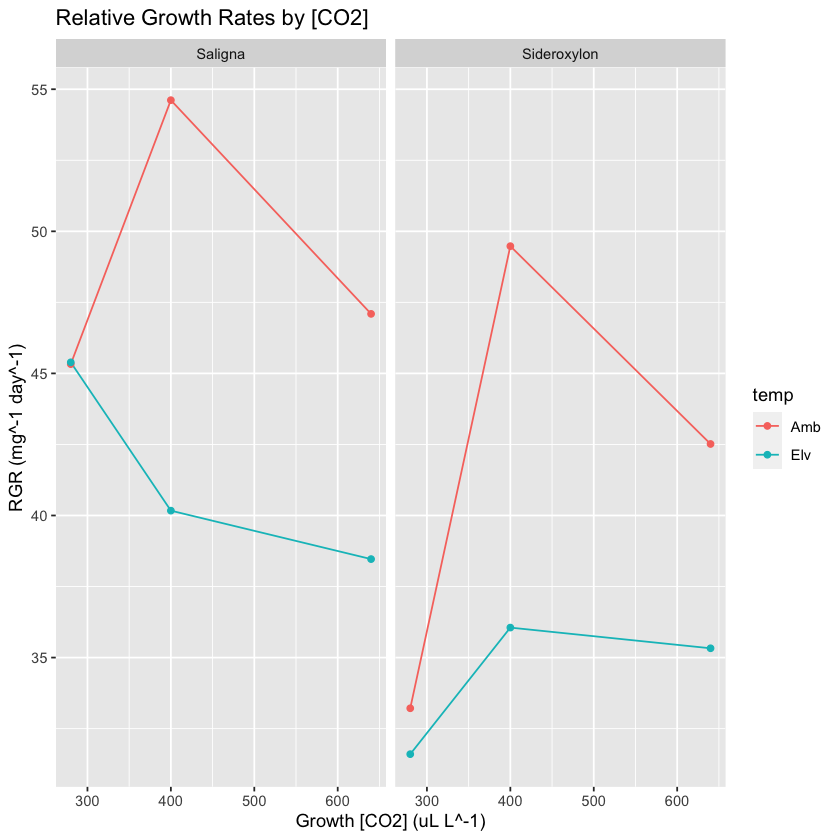

In [66]:
#Plotted RDR against CO2 color-coded by temp for each species

RGRplot <- ggplot(data =ghanB_rgr_nar, aes(x=CO2,y=rgr, colour = temp)) + geom_line(linetype = 1) + geom_point() + facet_wrap(~species)

RGRplot + ggtitle("Relative Growth Rates by [CO2]") +
  xlab("Growth [CO2] (uL L^-1)") + ylab("RGR (mg^-1 day^-1)")+
	scale_y_continuous(labels = label_number(scale = 1000))

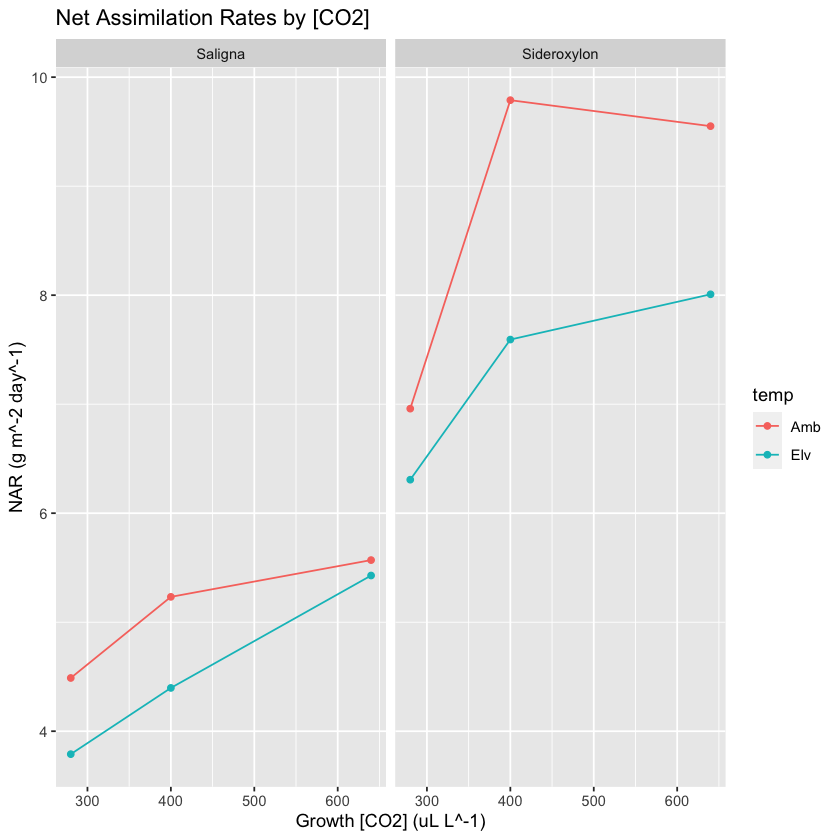

In [67]:
#Plotted NAR against CO2 by temp for each species

NARplot <- ggplot(data =ghanB_rgr_nar, aes(x=CO2,y=nar, colour = temp)) + geom_line(linetype = 1) + geom_point() + facet_wrap(~species)

NARplot + ggtitle("Net Assimilation Rates by [CO2]") +
  xlab("Growth [CO2] (uL L^-1)") + ylab("NAR (g m^-2 day^-1)")+
	scale_y_continuous(labels = label_number(scale = 10000))